# Caso 1. Análisis de una fabricación de queso camembert usando Google Colab.

En este ejercicio usaremos un fichero o archivo de datos en formato CSV que habremos exportado previamente desde nuestra hoja de cálculo. Más adelante aprenderemos cómo leer directamente los datos de nuestras hojas Excel.

[Abrir cuaderno en Google Colab/](https://colab.research.google.com/github/juanriera/master-queseria/blob/master/020-analisis-queso.ipynb)

[Descargar los datos de ejemplo `camembert.csv` usados en este cuaderno](https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv')

En este cuaderno vamos a cargar los datos desde GitHub; estos datos pueden ser descargados en el ordenador o Google Drive de cada uno, junto con el cuaderno, en los enlaces facilitados al principio. Una vez en Drive, puede leerse la tabla mediante el método que vimos al final del capítulo anterior.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url_datos = 'https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv'

try:
    df = pd.read_csv(url_datos, decimal = ",", sep=';', encoding='ISO-8859-1')
    print("¡Archivo ", url_datos," cargado correctamente!")
    print(f"Dimensiones de los datos: {df.shape}")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")

¡Archivo  https://raw.githubusercontent.com/juanriera/master-queseria/master/datos/camembert.csv  cargado correctamente!
Dimensiones de los datos: (211, 7)


Podemos mostrar el `dataframe` que hemos leído, mediante la funcion `.head()`, que nos muestra las cinco primeras lineas.

In [2]:
df.head()

,fecha,fabricacion,est,mg,ph,cloruros,coliformes
0,11/01/2020,1,46.68,24.0,4.85,1.50,80.0
1,12/01/2020,1,48.09,25.0,4.67,1.61,0.0
2,13/01/2020,1,45.97,24.0,4.71,1.48,9200.0
3,14/01/2020,1,46.24,23.5,4.78,1.69,20.0
4,15/01/2020,1,45.81,23.0,4.77,1.56,150.0


También podemos usar la función `.info()`, que nos dice la estructura interna de nuestro `dataframe` y el tipo de los datos (entero, numérico, carácter...). Dado que la fecha, como hemos visto, está formateada como fecha y asignada como `ìndex`, ya no aparece en el listado de columnas de datos, sino que aparece en la primera línea como `DateTimeIndex`, y la informacion nos dice los límites de esas fechas.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fecha        211 non-null    object 
 1   fabricacion  211 non-null    int64  
 2   est          211 non-null    float64
 3   mg           211 non-null    float64
 4   ph           211 non-null    float64
 5   cloruros     211 non-null    float64
 6   coliformes   210 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 11.7+ KB


## Introducción a los gráficos básicos

Una vez leído correctamente el `DataFrame`, podemos hacer algunos gráficos de sus columnas numéricas. También usaremos las funciones de `seaborn` que producen salidas muy atractivas y son funcionjes fáciles de manejar.

Exploremos los resultados de análisis de extracto seco total, recogidos en la variable `est` de nuestro `DataFrame`.

Para ello empezamos haciendo el histograma con `seaborn`, que nos permite incluir una **curva de densidad** fácilmente (pregunta: ¿qué es una curva de densidad?)

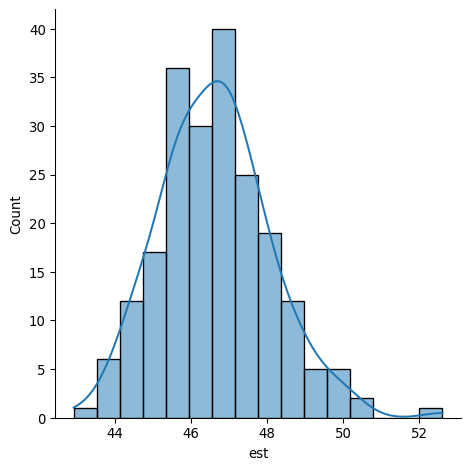

In [4]:
sns.displot(df["est"], kde = True)

plt.show()

Los histogramas nos muestran con claridad la **distribución** de los datos: los valores más frecuentes están entre 45% y 47%, y hay algún valor un poco más alto, por encima de 52%, que no parece que haya ocurrido muchas veces.

### El *boxplot*

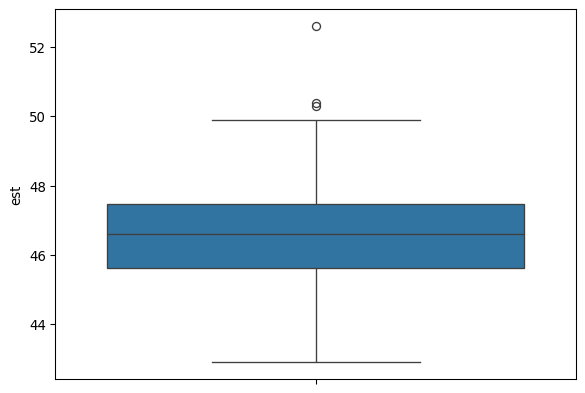

In [5]:
sns.boxplot(df['est'])

plt.show()

### Los gráficos de *series temporales*

En la celda en la que hemos obtenido la información del DataFrame con `df.info()`, veíamos que la columna `fecha` se lee como un `object`. En `Python`, un `object` es, por ejemplo, una cadena de caracteres. `Python` no tiene forma de saber que esto es una fecha, a menos que convirtamos explcícitamente el tipo de dato en fecha. Para ello, `Python` dispone de funciones muy sofisticadas que es muy conveniente conocer. Vamos, en primer lugar a dar el formato fecha a la columna, mediantela función 'Datetime

In [6]:

# Reemplazar la columna 'fecha' in-place
df['fecha'] = pd.to_datetime(
    df['fecha'], 
    format='%d/%m/%Y',
    errors='coerce' # Mantiene la robustez ante datos incorrectos
)

# Opcional: Verificar el cambio
print(df['fecha'].head())
print(df['fecha'].dtype)

0   2020-01-11
1   2020-01-12
2   2020-01-13
3   2020-01-14
4   2020-01-15
Name: fecha, dtype: datetime64[ns]
datetime64[ns]


Para representar los datos por mes, sólo tenemos que crear una nueva columna `mes` indicando a `pandas` que extraiga del índice la parte de fecha que corresponde al mes. ¿Fácil, no?

In [7]:
df['fecha_index']= pd.DatetimeIndex(df.fecha).normalize()
df.set_index('fecha_index',inplace=True)
df.sort_index(inplace=True)

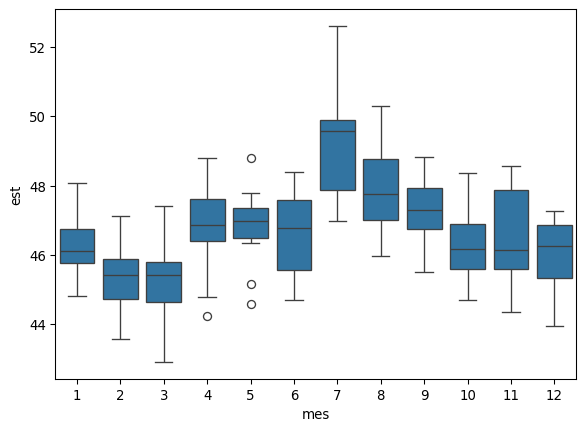

In [8]:
df['mes'] = df.index.month
sns.boxplot(x='mes', y='est', data=df)

plt.show()

En vez de usar el número para el mes, podemos usar el código de letras abreviado (en este caso, `seaborn`utiliza la abreviatura en inglés, pero hemos cambiado la codificación para que lo represente en español, en la instruccion `locale` que hemos usado en la primera casilla). Aprovechamos para personalizar un poco el gráfico.

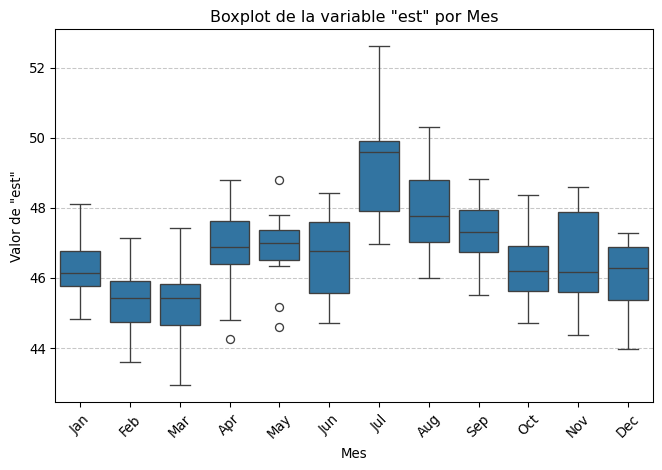

In [9]:
df['mes_abreviado'] = df.index.strftime('%b')
sns.boxplot(x='mes_abreviado', y='est', data=df)
# Opcional: Personalizar el gráfico
plt.title('Boxplot de la variable "est" por Mes')
plt.xlabel('Mes')
plt.ylabel('Valor de "est"')
plt.grid(axis='y', linestyle='--', alpha=0.7) # Añadir una cuadrícula para mejor lectura
plt.xticks(rotation=45) # Rotar las etiquetas del eje X si son muchas
plt.tight_layout() # Ajusta automáticamente los parámetros de la subtrama para un diseño ajustado

plt.show()


### Introducción a los gráficos de series temporales

Para utilizar las funciones de series de `pandas` resulta conveniente convertir en una columna de fecha la primera columna, que `pandas` ha leido como texto, y asignarla como `index` del dataframe; el formateo de series temporales en esta biblioteca es uno de sus puntos más fuertes.

In [10]:
df['fecha_index']= pd.DatetimeIndex(df.fecha).normalize()
df.set_index('fecha_index',inplace=True)
df.sort_index(inplace=True)

La función `.plot()` nos representa los valores de la columna en orden secuencial:

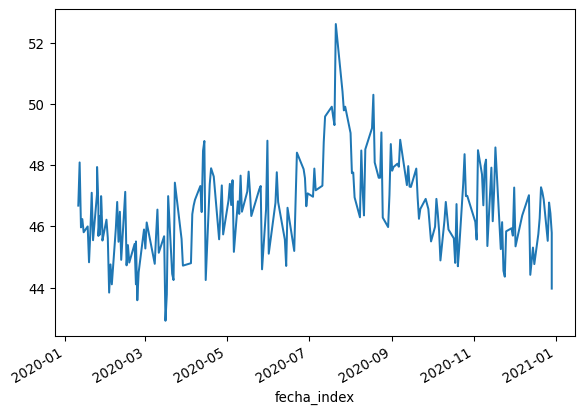

In [11]:
df["est"].plot()
plt.show()

Si utilizamos las funciones de `pandas`, podemos reformatear las fechas como serie temporal. Creamos una serie temporal y la remuestreamos para hacer las medias semanales del extracto seco total, eliminando las semans en las que no hay valores con `.dropna()`. La función `resample('W-MON')` formatea las fechas para que las semanas empiecen en lunes, como es el caso en Europa (en USA la semana empieza el domingo). Aprovechamos para mostrar una de las potencias de `Python`: podemos hacer que varios cálculos se hagan a continuacion de los otros, simplemente enlazando las funciones, hasta el `.plot()`

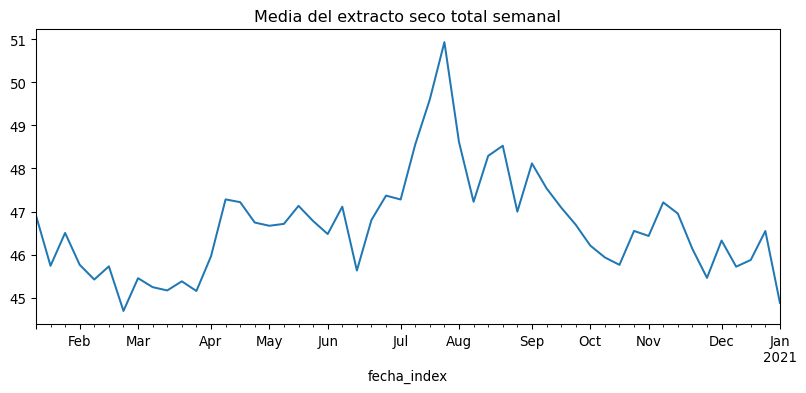

In [12]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
ts = pd.Series(df["est"].dropna())
ts.resample('W-MON').mean().plot(title="Media del extracto seco total semanal")
plt.show()

Veamos a continuación otras formas de formatear la serie sobre la marcha, pero esta vez representando la `desviación típica`en vez de la `media`.

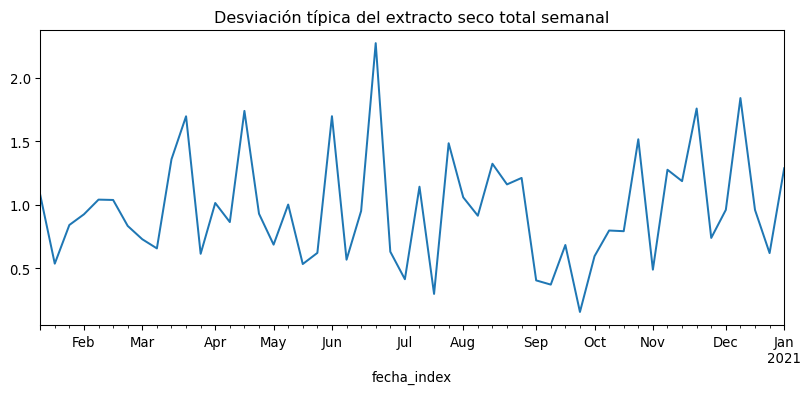

In [13]:
ts.resample('W-MON').std().plot(title="Desviación típica del extracto seco total semanal");

O podemos representar un período específico de la serie indicando a `pandas` los límites inferior y superior de las fechas que queremos.

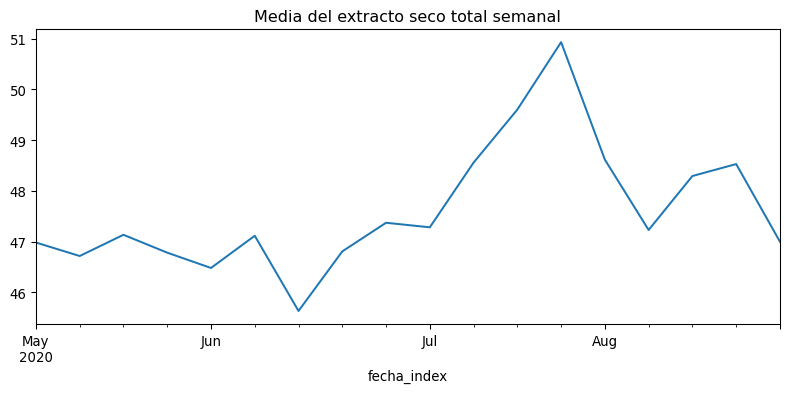

In [14]:
ts["2020-05":"2020-08"].resample('W-MON').mean().plot(title="Media del extracto seco total semanal");

A modo ilustrativo, aunque sin un interés prioritario, muestro un grafico `jointplot()` de `seaborn` que muestra la facilidad con la que esta biblioteca puede hacer un gráfico complejo de dispersión e histograma simultáneamente.

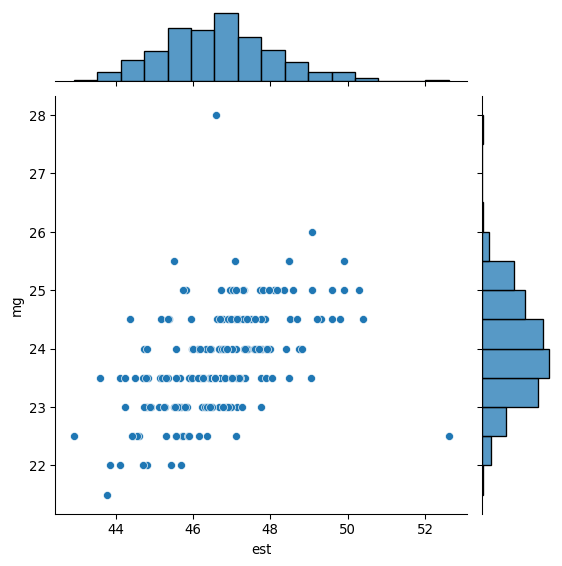

In [15]:
sns.jointplot(x="est", y="mg", data = df[~df.index.duplicated(keep='first')])

Finalmente, una serie de cálculos más complejos para obtener los gráficos de capacidad de un proceso, como muestra de cómo se pueden usar las funciones y gráficos de `Python` para prácticamente cualquier necesidad.

A continuación, una serie de celdas que realizan gráficos diversos, puedes dedicar un rato a estudiarlas e intentar comprender bien su programación.

In [16]:
limite_rechazo = 231    ##
limite_deficientes = 242    ##

LSL = df.est.mean() - 3 * df.est.std()    ## lower specification limit
USL = df.est.mean() + 3 * df.est.std()    ## upper specification limit

df.insert(6,'LSL', LSL)
df.insert(7,'USL', USL)


In [17]:
df['fecha'] = df.index

In [18]:
df.head()

,fecha,fabricacion,est,mg,ph,cloruros,LSL,USL,coliformes,mes,mes_abreviado
fecha_index,,,,,,,,,,,
2020-01-11,2020-01-11,1,46.68,24.0,4.85,1.50,42.279767,50.994641,80.0,1,Jan
2020-01-12,2020-01-12,1,48.09,25.0,4.67,1.61,42.279767,50.994641,0.0,1,Jan
2020-01-13,2020-01-13,1,45.97,24.0,4.71,1.48,42.279767,50.994641,9200.0,1,Jan
2020-01-14,2020-01-14,1,46.24,23.5,4.78,1.69,42.279767,50.994641,20.0,1,Jan
2020-01-15,2020-01-15,1,45.81,23.0,4.77,1.56,42.279767,50.994641,150.0,1,Jan


In [19]:
df2 = pd.melt(df, id_vars= ['fecha'], value_vars=["est","LSL", "USL"],  value_name="valores")

In [20]:
df2.head()

,fecha,variable,valores
0,2020-01-11,est,46.68
1,2020-01-12,est,48.09
2,2020-01-13,est,45.97
3,2020-01-14,est,46.24
4,2020-01-15,est,45.81


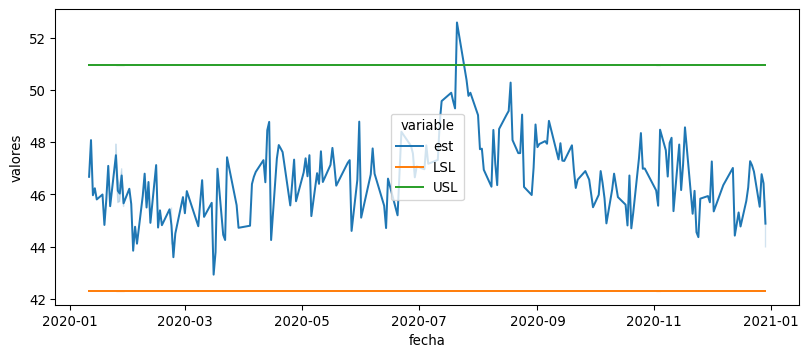

In [21]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
g = sns.lineplot(data=df2, x="fecha", y="valores", hue="variable")

In [22]:
df3 = df2.groupby([df2['fecha'].dt.isocalendar().week, "variable"]).mean()

In [23]:
df3.reset_index(inplace=True)

In [24]:
df3.head()

,week,variable,fecha,valores
0,2,LSL,2020-01-11 12:00:00,42.279767
1,2,USL,2020-01-11 12:00:00,50.994641
2,2,est,2020-01-11 12:00:00,47.385000
3,3,LSL,2020-01-15 19:12:00,42.279767
4,3,USL,2020-01-15 19:12:00,50.994641


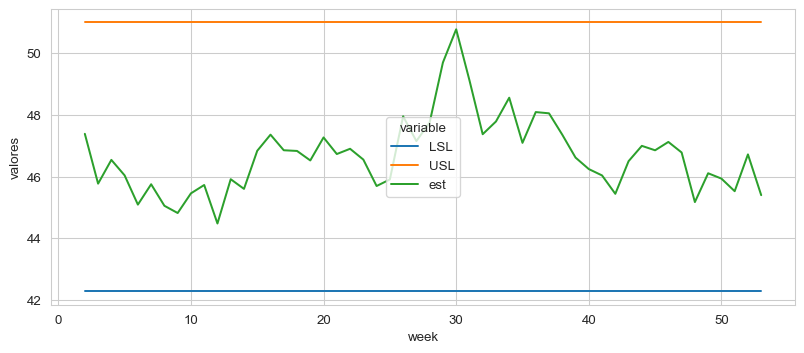

In [25]:
plt.rcParams['figure.figsize'] = (10.0,4.0)
sns.set_style("whitegrid")
g = sns.lineplot(data=df3, x="week", y="valores", hue="variable")

In [26]:
df2 = df.copy()
df.drop(['fabricacion','mg', 'cloruros','coliformes'], axis=1, inplace = True)

In [27]:
df2 = df2['est'].groupby(df['fecha'].dt.isocalendar().week).agg(['mean','std'])

In [28]:
df2.head()

,mean,std
week,,
2,47.385000,0.997021
3,45.770000,0.547494
4,46.540000,0.893476
5,46.037778,0.493958
6,45.090000,1.252837


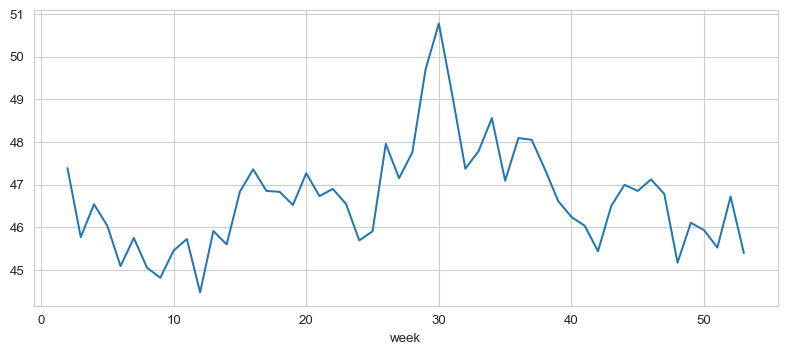

In [29]:
df2['mean'].plot();

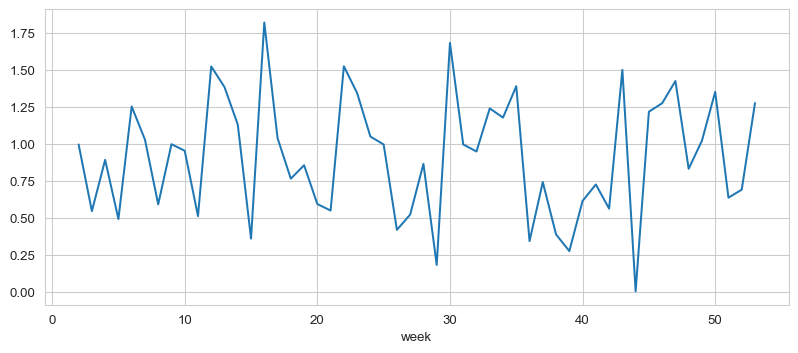

In [30]:
df2['std'].plot();

In [31]:
LSL = df2['mean'] - 3 * df2['std']    ## lower specification limit
USL = df2['mean'] + 3 * df2['std']    ## upper specification limit

df2.insert(2,'LSL', LSL)
df2.insert(3,'USL', USL)

# limite_rechazo = 231    ##
# limite_deficientes = 242    ##
# df3.insert(5,'rechazo', limite_rechazo)
# df3.insert(6,'deficientes', limite_deficientes)


In [32]:
df2.head()

,mean,std,LSL,USL
week,,,,
2,47.385000,0.997021,44.393938,50.376062
3,45.770000,0.547494,44.127517,47.412483
4,46.540000,0.893476,43.859571,49.220429
5,46.037778,0.493958,44.555904,47.519652
6,45.090000,1.252837,41.331490,48.848510


In [33]:
df2['semana'] = df2.index # necesitamos la semana en una columna de valor
df3 = pd.melt(df2, id_vars= ['semana'], value_vars=["mean","LSL", "USL"],  value_name="valores")

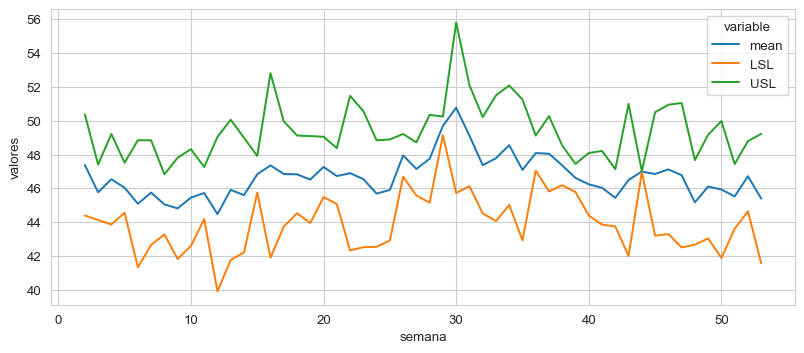

In [34]:
g = sns.lineplot(data=df3, x="semana", y="valores", hue="variable")